In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

# Processing data

In [14]:
CLEVR_STAGE = 1
class_files = glob(f'./../results/k-swap-clevr/results-clevr-5000-stage-{CLEVR_STAGE}*')
len(class_files)

4

In [15]:
column_names = ["_cost", "_real_time", "_run_time", "_gen_size", "_phi_size",
                "exhaustive_msg_cost", "exhaustive_msg_real_time", "exhaustive_msg_run_time", "exhaustive_msg_gen_size", "exhaustive_msg_phi_size",
                "G1_length", "G2_length", "G1_variables", "G2_variables", "var_coeff", "atom_coeff",
                "class", "k", "W", "V", "scope"]

baseline_exhaustive_df = pd.concat((pd.read_csv(f, names=column_names) for f in class_files), ignore_index=True)
print(baseline_exhaustive_df.shape)
baseline_exhaustive_df.head()

(20000, 21)


,_cost,_real_time,_run_time,_gen_size,_phi_size,exhaustive_msg_cost,exhaustive_msg_real_time,exhaustive_msg_run_time,exhaustive_msg_gen_size,exhaustive_msg_phi_size,...,G2_length,G1_variables,G2_variables,var_coeff,atom_coeff,class,k,W,V,scope
0,16,1.0,1.0,10,4,16,4.0,4.0,6,4,...,6,10,7,604800,144,5000,1,1,NIL,global
1,18,0.0,0.0,7,3,16,4.0,4.0,6,3,...,6,8,7,40320,36,5000,1,1,NIL,global
2,20,0.0,0.0,6,2,20,4.0,4.0,6,2,...,4,10,5,30240,72,5000,1,1,NIL,global
3,18,0.0,0.0,9,3,16,4.0,4.0,12,3,...,4,10,5,30240,144,5000,1,1,NIL,global
4,16,0.0,1.0,5,3,12,4.0,3.0,2,3,...,4,8,5,6720,12,5000,1,1,NIL,global


In [16]:
column_names = ["kswap_msg_cost", "kswap_msg_real_time", "kswap_msg_run_time", "kswap_msg_gen_size", "kswap_msg_phi_size",
                "_cost", "_real_time", "_run_time", "_gen_size", "_phi_size",
                "G1_length", "G2_length", "G1_variables", "G2_variables", "var_coeff", "atom_coeff",
                "class", "k", "W", "V", "scope"]

kswap_df = pd.concat((pd.read_csv(f, names=column_names) for f in class_files), ignore_index=True)
print(kswap_df.shape)
kswap_df.head()

(20000, 21)


,kswap_msg_cost,kswap_msg_real_time,kswap_msg_run_time,kswap_msg_gen_size,kswap_msg_phi_size,_cost,_real_time,_run_time,_gen_size,_phi_size,...,G2_length,G1_variables,G2_variables,var_coeff,atom_coeff,class,k,W,V,scope
0,16,1.0,1.0,10,4,16,4.0,4.0,6,4,...,6,10,7,604800,144,5000,1,1,NIL,global
1,18,0.0,0.0,7,3,16,4.0,4.0,6,3,...,6,8,7,40320,36,5000,1,1,NIL,global
2,20,0.0,0.0,6,2,20,4.0,4.0,6,2,...,4,10,5,30240,72,5000,1,1,NIL,global
3,18,0.0,0.0,9,3,16,4.0,4.0,12,3,...,4,10,5,30240,144,5000,1,1,NIL,global
4,16,0.0,1.0,5,3,12,4.0,3.0,2,3,...,4,8,5,6720,12,5000,1,1,NIL,global


In [17]:
# Split the columns in multiple rows
# Instead of having the cost, time, etc. for each algorithm on the same row,
# create different rows for each algorithm.

common_columns = ["G1_length", "G2_length", "G1_variables", "G2_variables", "var_coeff", "atom_coeff", "class", "k", "W", "V", "scope"]
#baseline_lcg_columns = ["baseline_lcg_cost", "baseline_lcg_real_time", "baseline_lcg_run_time", "baseline_lcg_gen_size", "baseline_lcg_phi_size"]
#baseline_msg_columns = ["baseline_msg_cost", "baseline_msg_real_time", "baseline_msg_run_time", "baseline_msg_gen_size", "baseline_msg_phi_size"]
#exhaustive_lcg_columns = ["exhaustive_lcg_cost", "exhaustive_lcg_real_time", "exhaustive_lcg_run_time", "exhaustive_lcg_gen_size", "exhaustive_lcg_phi_size"]
exhaustive_msg_columns = ["exhaustive_msg_cost", "exhaustive_msg_real_time", "exhaustive_msg_run_time", "exhaustive_msg_gen_size", "exhaustive_msg_phi_size"]
#kswap_lcg_columns = ["kswap_lcg_cost", "kswap_lcg_real_time", "kswap_lcg_run_time", "kswap_lcg_gen_size", "kswap_lcg_phi_size"]
kswap_msg_columns = ["kswap_msg_cost", "kswap_msg_real_time", "kswap_msg_run_time", "kswap_msg_gen_size", "kswap_msg_phi_size"]

be_algorithms_and_columns = {
    "exhaustive_msg": exhaustive_msg_columns,  
}

k_algorithms_and_columns = { 
    "kswap_msg": kswap_msg_columns,
}

new_columns = ["cost", "real_time", "run_time", "gen_size", "phi_size"]

In [18]:
new_rows = []
for index, row in baseline_exhaustive_df.iterrows():
    for algorithm_name, algorithm_columns in be_algorithms_and_columns.items():
        common_data = row[common_columns].to_dict()
        algo_data = row[algorithm_columns].to_dict()
        for old_name, new_name in zip(algorithm_columns, new_columns):
            algo_data[new_name] = algo_data.pop(old_name)
        algo_name = {'algorithm': algorithm_name}
        new_row = {**algo_name, **algo_data, **common_data}
        new_rows.append(new_row)
    
column_names = ['algorithm'] + new_columns + common_columns
baseline_exhaustive_data = pd.DataFrame(new_rows, columns=column_names)

In [19]:
print(baseline_exhaustive_data.shape)
baseline_exhaustive_data.head()

(20000, 17)


,algorithm,cost,real_time,run_time,gen_size,phi_size,G1_length,G2_length,G1_variables,G2_variables,var_coeff,atom_coeff,class,k,W,V,scope
0,exhaustive_msg,16,4.0,4.0,6,4,10,6,10,7,604800,144,5000,1,1,NIL,global
1,exhaustive_msg,16,4.0,4.0,6,3,8,6,8,7,40320,36,5000,1,1,NIL,global
2,exhaustive_msg,20,4.0,4.0,6,2,10,4,10,5,30240,72,5000,1,1,NIL,global
3,exhaustive_msg,16,4.0,4.0,12,3,10,4,10,5,30240,144,5000,1,1,NIL,global
4,exhaustive_msg,12,4.0,3.0,2,3,8,4,8,5,6720,12,5000,1,1,NIL,global


In [20]:
new_rows = []
for index, row in kswap_df.iterrows():
    for algorithm_name, algorithm_columns in k_algorithms_and_columns.items():
        common_data = row[common_columns].to_dict()
        algo_data = row[algorithm_columns].to_dict()
        for old_name, new_name in zip(algorithm_columns, new_columns):
            algo_data[new_name] = algo_data.pop(old_name)
        algo_name = {'algorithm': algorithm_name}
        new_row = {**algo_name, **algo_data, **common_data}
        new_rows.append(new_row)
    
column_names = ['algorithm'] + new_columns + common_columns
kswap_data = pd.DataFrame(new_rows, columns=column_names)

In [21]:
print(kswap_data.shape)
kswap_data.head()

(20000, 17)


,algorithm,cost,real_time,run_time,gen_size,phi_size,G1_length,G2_length,G1_variables,G2_variables,var_coeff,atom_coeff,class,k,W,V,scope
0,kswap_msg,16,1.0,1.0,10,4,10,6,10,7,604800,144,5000,1,1,NIL,global
1,kswap_msg,18,0.0,0.0,7,3,8,6,8,7,40320,36,5000,1,1,NIL,global
2,kswap_msg,20,0.0,0.0,6,2,10,4,10,5,30240,72,5000,1,1,NIL,global
3,kswap_msg,18,0.0,0.0,9,3,10,4,10,5,30240,144,5000,1,1,NIL,global
4,kswap_msg,16,0.0,1.0,5,3,8,4,8,5,6720,12,5000,1,1,NIL,global


In [22]:
data = pd.concat([baseline_exhaustive_data, kswap_data])
data.head()

,algorithm,cost,real_time,run_time,gen_size,phi_size,G1_length,G2_length,G1_variables,G2_variables,var_coeff,atom_coeff,class,k,W,V,scope
0,exhaustive_msg,16,4.0,4.0,6,4,10,6,10,7,604800,144,5000,1,1,NIL,global
1,exhaustive_msg,16,4.0,4.0,6,3,8,6,8,7,40320,36,5000,1,1,NIL,global
2,exhaustive_msg,20,4.0,4.0,6,2,10,4,10,5,30240,72,5000,1,1,NIL,global
3,exhaustive_msg,16,4.0,4.0,12,3,10,4,10,5,30240,144,5000,1,1,NIL,global
4,exhaustive_msg,12,4.0,3.0,2,3,8,4,8,5,6720,12,5000,1,1,NIL,global


In [28]:
data.to_pickle(f'./../results/k-swap-clevr/results-clevr-stage-1.pickle')

# Processing relative data

In [29]:
def percentage_of(value, base_value):
    if value > 0 and base_value > 0:
        frac = value / base_value
        percentage = frac * 100
        return percentage

In [34]:
def percentage_increase(orig_value, new_value):
    if orig_value > 0 and new_value > 0:
        difference = new_value - orig_value
        increase = difference / orig_value
        percentage = increase * 100
        return percentage

In [35]:
be_column_names = ["_cost", "_real_time", "_run_time", "_gen_size", "_phi_size",
                   "exhaustive_msg_cost", "exhaustive_msg_real_time", "exhaustive_msg_run_time", "exhaustive_msg_gen_size", "exhaustive_msg_phi_size",
                   "G1_length", "G2_length", "G1_variables", "G2_variables", "var_coeff", "atom_coeff",
                   "class", "k", "W", "V", "scope"]

In [36]:
kswap_column_names = ["kswap_msg_cost", "kswap_msg_real_time", "kswap_msg_run_time", "kswap_msg_gen_size", "kswap_msg_phi_size",
                      "_cost", "_real_time", "_run_time", "_gen_size", "_phi_size",
                      "G1_length", "G2_length", "G1_variables", "G2_variables", "var_coeff", "atom_coeff",
                      "class", "k", "W", "V", "scope"]

In [37]:
common_columns = ["G1_length", "G2_length", "G1_variables", "G2_variables", "var_coeff", "atom_coeff", "class", "k", "W", "V", "scope"]

new_rows = []
for file in class_files:
    exhaustive_df = pd.read_csv(file, names=be_column_names)
    kswap_df = pd.read_csv(file, names=kswap_column_names)
    for (be_index, be_row), (k_index, k_row) in zip(exhaustive_df.iterrows(), kswap_df.iterrows()):
        common_data = k_row[common_columns].to_dict()
        relative_data = {
            'cost_increase': percentage_increase(be_row['exhaustive_msg_cost'], k_row['kswap_msg_cost']),
        }
        new_row = {**common_data, **relative_data}
        new_rows.append(new_row)

new_column_names = ['cost_increase'] + common_columns
relative_df = pd.DataFrame(new_rows, columns=new_column_names)

In [39]:
print(relative_df.shape)
relative_df.head()

(20000, 12)


,cost_increase,G1_length,G2_length,G1_variables,G2_variables,var_coeff,atom_coeff,class,k,W,V,scope
0,0.000000,10,6,10,7,604800,144,5000,1,1,NIL,global
1,12.500000,8,6,8,7,40320,36,5000,1,1,NIL,global
2,0.000000,10,4,10,5,30240,72,5000,1,1,NIL,global
3,12.500000,10,4,10,5,30240,144,5000,1,1,NIL,global
4,33.333333,8,4,8,5,6720,12,5000,1,1,NIL,global


In [40]:
relative_df.to_pickle(f'./../results/k-swap-clevr/relative-results-clevr-stage-1.pickle')

## Read pickle files

In [2]:
data = pd.read_pickle('./../results/k-swap-clevr/results-clevr-stage-1.pickle')
relative_data = pd.read_pickle('./../results/k-swap-clevr/relative-results-clevr-stage-1.pickle')

In [3]:
def select_from_data(df, algorithm=None, k=None, W=None, V=None, scope=None):
    # Flexible function for selecting rows from the dataframe
    d = {}
    if algorithm is not None:
        d['algorithm'] = algorithm
    if k is not None:
        d['k'] = k
    if W is not None:
        d['W'] = W
    if V is not None:
        d['V'] = V
    if scope is not None:
        d['scope'] = scope
    query = " & ".join(["(df['{0}'] == {1})".format(col, repr(cond)) for col, cond in d.items()])
    # print(query)
    return df[eval(query)]

In [12]:
relative_data.groupby(['k', 'W'])['cost_increase'].describe()

,,count,mean,std,min,25%,50%,75%,max
k,W,,,,,,,,
1,1,4999.0,4.779056,11.549378,0.0,0.0,0.0,0.0,300.000000
2,2,4999.0,1.545543,5.670044,0.0,0.0,0.0,0.0,75.000000
3,3,4999.0,0.669798,3.006975,0.0,0.0,0.0,0.0,50.000000
4,4,4999.0,0.595010,2.685561,0.0,0.0,0.0,0.0,16.666667


In [23]:
kwap_data = select_from_data(data, algorithm='kswap_msg')
exhaustive_data = select_from_data(data, algorithm='exhaustive_msg')
print(exhaustive_data['real_time'].describe())
kwap_data.groupby(['k', 'W'])['real_time'].describe()

count    20000.000000
mean         0.508000
std          0.677022
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: real_time, dtype: float64


,,count,mean,std,min,25%,50%,75%,max
k,W,,,,,,,,
1,1,5000.0,0.7790,1.514800,0.0,0.0,0.0,1.0,45.0
2,2,5000.0,4.1592,18.292162,0.0,0.0,1.0,2.0,748.0
3,3,5000.0,33.7078,400.367442,0.0,0.0,1.0,3.0,20886.0
4,4,5000.0,225.0874,6642.194094,0.0,0.0,1.0,3.0,443870.0


## Relative size of phi (k-swap)

In [ ]:
relative_data.groupby(['W', 'V', 'k'])['exhaustive_lcg_phi_frac'].mean()

In [ ]:
grid = sns.FacetGrid(relative_data, row='W', col='V')
grid.map(sns.boxplot, 'exhaustive_lcg_phi_frac', 'k', order=[0, 2, 4, 'NIL'])

## Percentage of solutions found within timeout

Text(0.5, 1.0, 'Percentage of solutions found within timeout (600s)')

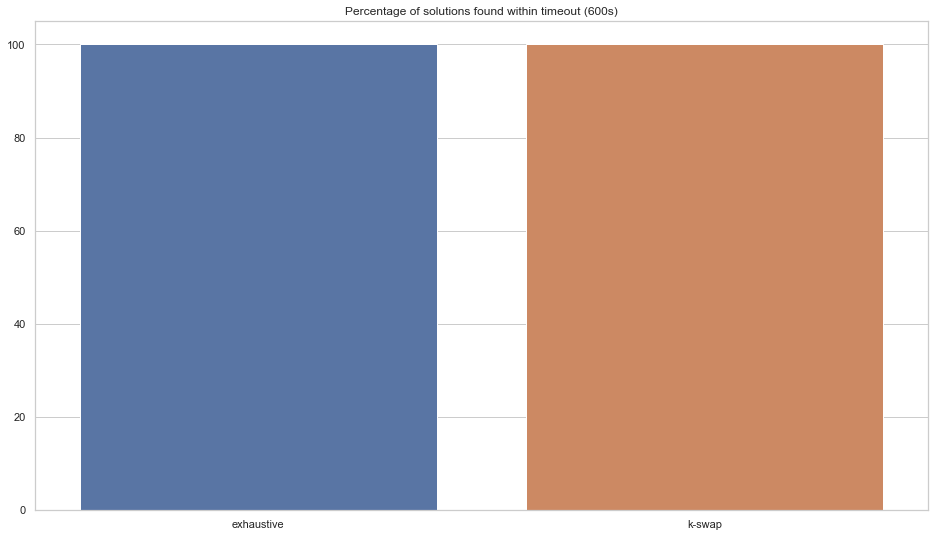

In [5]:
exhaustive_data = select_from_data(data, algorithm='exhaustive_msg', k=1, W=1)
kswap_data = select_from_data(data, algorithm='kswap_msg', k=1, W=1)

exhaustive_data_found = exhaustive_data.loc[exhaustive_data['cost'] > -1]
kswap_data_found = kswap_data.loc[kswap_data['cost'] > -1]

solutions_found_data = {
    'exhaustive': (len(exhaustive_data_found)/len(exhaustive_data))*100,
    'k-swap': (len(kswap_data_found)/len(kswap_data))*100,
}

fig, ax = plt.subplots(figsize=(16,9))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=list(solutions_found_data.keys()), y=list(solutions_found_data.values()))
ax.set_title('Percentage of solutions found within timeout (600s)')
# plt.savefig('clevr-stage-3-percentage-solutions.pdf', bbox_inches='tight')

## Overview of cost

In [ ]:
# Select parameters
plot_df = select_from_data(data, k='NIL', W=1, V=1, scope='global')

# Exclude rows where solution was not found
plot_df = plot_df.loc[plot_df['cost'] > -1]
injective_algo_df = plot_df[plot_df['algorithm'].isin(['kswap_injective', 'exhaustive_injective', 'baseline_injective'])]
decoupling_algo_df = plot_df[plot_df['algorithm'].isin(['kswap_decoupling', 'exhaustive_decoupling', 'baseline_decoupling'])]

# Plot per algorithm
sns.set_theme(style='whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))
ax1 = sns.violinplot(data=injective_algo_df, x='cost', y='algorithm', ax=ax1)
ax2 = sns.violinplot(data=decoupling_algo_df, x='cost', y='algorithm', ax=ax2)
plt.show()

## Relative change in cost?

In [ ]:
# Select parameters
plot_df = select_from_data(relative_data, k='NIL', W=1, V=1, scope='global')

# Exclude rows where solution was not found
plot_df = plot_df.dropna()

columns = ['kd_ex_cost_increase', 'k_ex_inj_cost_increase', 'kd_b_cost_increase', 'k_b_inj_cost_increase']

# Plot per algorithm
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.boxplot(data=plot_df[columns])
ax.set_xticklabels(['kswap vs exhaustive (decoupling)', 'kswap vs exhaustive (injective)', 'kswap vs baseline (decoupling)', 'kswap vs baseline (injective)'])
plt.show()

## Impact of omega scope (global vs local)

In [ ]:
# Select parameters
plot_df = select_from_data(data, k='NIL', W=1, V=1)

# Exclude rows where solution was not found
plot_df = plot_df.loc[plot_df['cost'] > -1]
injective_algo_df = plot_df[plot_df['algorithm'].isin(['kswap_injective', 'exhaustive_injective', 'baseline_injective'])]
decoupling_algo_df = plot_df[plot_df['algorithm'].isin(['kswap_decoupling', 'exhaustive_decoupling', 'baseline_decoupling'])]

# Plot per algorithm
sns.set_theme(style='whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))
ax1 = sns.violinplot(data=injective_algo_df, x='cost', y='algorithm', hue='scope', split=True, ax=ax1)
ax2 = sns.violinplot(data=decoupling_algo_df, x='cost', y='algorithm', hue='scope', split=True, ax=ax2)
plt.show()

## Overview of runtime

In [ ]:
# Select parameters
plot_df = select_from_data(data, k='NIL', W=1, V=1, scope='global')

# Exclude rows where solution was not found
plot_df = plot_df.loc[plot_df['cost'] > -1]
#plot_df = plot_df[plot_df['algorithm'].isin(['kswap_injective', 'kswap_decoupling'])]

# Plot per algorithm
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.violinplot(data=plot_df, x='real_time', y='algorithm', cut=0)
plt.show()

In [ ]:
grid_df = select_from_data(data, algorithm="kswap_injective", scope="global")
grid_df = grid_df.loc[grid_df['cost'] > -1]
grid = sns.FacetGrid(grid_df, row='W', col='V')
grid.map(sns.violinplot, 'cost')